<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/Pandas8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47


In [3]:
df['Negative Comment'] = df['Comments'].str.contains('improvement|bad|poor', case=False, na=False)
dissatisfaction_category = df[df['Negative Comment']].groupby('Purchased Category').size().idxmax()
print(dissatisfaction_category)

Beauty


In [4]:
from collections import Counter
comment_keywords = Counter(" ".join(df['Comments'].dropna()).split())
print(comment_keywords.most_common(5))

[('with', 4), ('the', 4), ('Satisfied', 3), ('customer', 3), ('service', 2)]


In [5]:
pivot_spent = df.pivot_table(values='Total Spent', index='Gender', columns='Purchased Category', aggfunc='sum')
print(pivot_spent)

Purchased Category  Beauty  Books  Clothing  Electronics  Home Goods
Gender                                                              
F                      400   1900       150         1010        1680
M                      800    450      1450          670         410


In [7]:
high_value_customers = df[(df['Total Spent'] > df['Total Spent'].mean()) &
                         (df['Converted'] > df['Converted'].mean())]
print(high_value_customers)

    Customer ID  Age Gender  Total Spent  Converted  \
1             2   35      M          600          1   
6             7   38      F          670          1   
9            10   33      M          750          1   
10           11   40      F          610          1   
14           15   36      F          510          1   
17           18   35      M          700          1   

                           Comments Purchased Category  Stock  \
1     Needs improvement in delivery             Beauty     86   
6           Prefers online shopping         Home Goods     69   
9              High conversion rate           Clothing     45   
10                   Low engagement         Home Goods     68   
14                 Enjoys discounts        Electronics     55   
17  Satisfied with customer service           Clothing     87   

    Negative Comment  
1               True  
6              False  
9              False  
10             False  
14             False  
17             False

<ipython-input-8-337929736a2c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby(age_bins)['Total Spent'].mean()


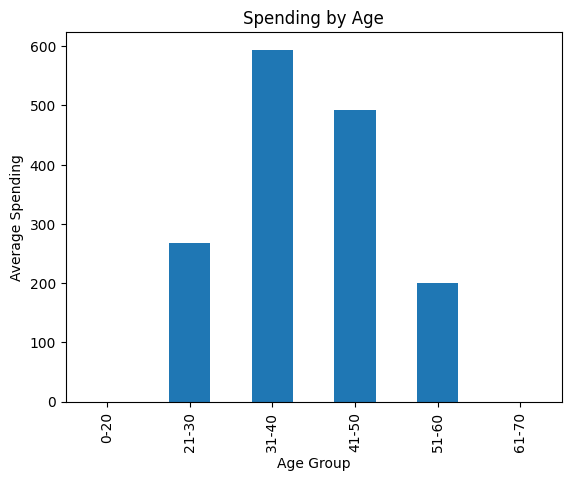

In [8]:
import matplotlib.pyplot as plt

age_bins = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
age_spending = df.groupby(age_bins)['Total Spent'].mean()
age_spending.plot(kind='bar', title='Spending by Age', xlabel='Age Group', ylabel='Average Spending')
plt.show()

In [9]:
multi_category_customers = df.groupby('Customer ID')['Purchased Category'].nunique()
customers_in_multiple_categories = multi_category_customers[multi_category_customers > 1]
print(customers_in_multiple_categories)

Series([], Name: Purchased Category, dtype: int64)


In [10]:
age_group_conversion = df.groupby(age_bins)['Converted'].mean()
print(age_group_conversion)

Age
0-20          NaN
21-30    0.833333
31-40    0.857143
41-50    0.166667
51-60    0.000000
61-70         NaN
Name: Converted, dtype: float64


<ipython-input-10-608d5ed17a35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_conversion = df.groupby(age_bins)['Converted'].mean()
